# [Module 2.1] Feature Engineering

## Load Data

In [1]:
import pandas as pd
import os

data_folder = '../../../data/AdTalking'

In [2]:
%%time
file = 'train.csv'
file_path = os.path.join(data_folder, file)

df = pd.read_csv(file_path, parse_dates=['click_time'])
df

CPU times: user 1min 31s, sys: 10.7 s, total: 1min 42s
Wall time: 1min 58s


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0
...,...,...,...,...,...,...,...,...
184903885,121312,12,1,10,340,2017-11-09 16:00:00,NaN,0
184903886,46894,3,1,19,211,2017-11-09 16:00:00,NaN,0
184903887,320126,1,1,13,274,2017-11-09 16:00:00,NaN,0
184903888,189286,12,1,37,259,2017-11-09 16:00:00,NaN,0


## Feature Engineering

### 불필요한 컬럼 없애기

In [3]:
def drop_column(raw_df, col):
    df = raw_df.drop(columns=[col])
    return df

df = drop_column(df, col='attributed_time')

In [4]:
df.head()

,ip,app,device,os,channel,click_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,0
1,17357,3,1,19,379,2017-11-06 14:33:34,0
2,35810,3,1,13,379,2017-11-06 14:34:12,0
3,45745,14,1,13,478,2017-11-06 14:34:52,0
4,161007,3,1,13,379,2017-11-06 14:35:08,0


In [39]:
len(df["ip"].unique())

277396

AdTalking 데이터는 IP 주소를 생략할 수 있습니다. 다만 encoding 이 되어지지 않는 IP 주소는 다음과 같은 EDA 를 고려할 수 있습니다.

* 지역 정보

### 데이터의 타입을 살펴봅니다

In [11]:
df.dtypes

ip                        int64
app                       int64
device                    int64
os                        int64
channel                   int64
click_time       datetime64[ns]
is_attributed             int64
dtype: object

### 데이터에 NaN 값이 있는지 확인해봅니다.

In [30]:
df.isnull().any().any()

False

### describe() 메소드를 통해 다양한 인사이트를 구합니다

In [8]:
df.describe()

,ip,app,device,os,channel,is_attributed
count,1.849039e+08,1.849039e+08,1.849039e+08,1.849039e+08,1.849039e+08,1.849039e+08
mean,9.087604e+04,1.201131e+01,2.172325e+01,2.267702e+01,2.685789e+02,2.470721e-03
std,6.952789e+04,1.480521e+01,2.593326e+02,5.525282e+01,1.295882e+02,4.964491e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.024500e+04,3.000000e+00,1.000000e+00,1.300000e+01,1.400000e+02,0.000000e+00
50%,7.962200e+04,1.200000e+01,1.000000e+00,1.800000e+01,2.580000e+02,0.000000e+00
75%,1.182470e+05,1.500000e+01,1.000000e+00,1.900000e+01,3.790000e+02,0.000000e+00
max,3.647780e+05,7.680000e+02,4.227000e+03,9.560000e+02,5.000000e+02,1.000000e+00


__전체 레코드의 숫자때문에 지수로 표기되는걸 확인할 수 있습니다. 지수를 Float 형식으로 바꿔주고 다시 describe() 메소드를 사용합니다.__

In [12]:
pd.set_option('display.float_format', '{:.1f}'.format)

In [13]:
df.describe()

,ip,app,device,os,channel,is_attributed
count,184903890.0,184903890.0,184903890.0,184903890.0,184903890.0,184903890.0
mean,90876.0,12.0,21.7,22.7,268.6,0.0
std,69527.9,14.8,259.3,55.3,129.6,0.0
min,1.0,0.0,0.0,0.0,0.0,0.0
25%,40245.0,3.0,1.0,13.0,140.0,0.0
50%,79622.0,12.0,1.0,18.0,258.0,0.0
75%,118247.0,15.0,1.0,19.0,379.0,0.0
max,364778.0,768.0,4227.0,956.0,500.0,1.0


__Histogram 을 통해 각 컬럼별 데이터의 분포가 어떻게 이루어져 있는지 확인합니다.__

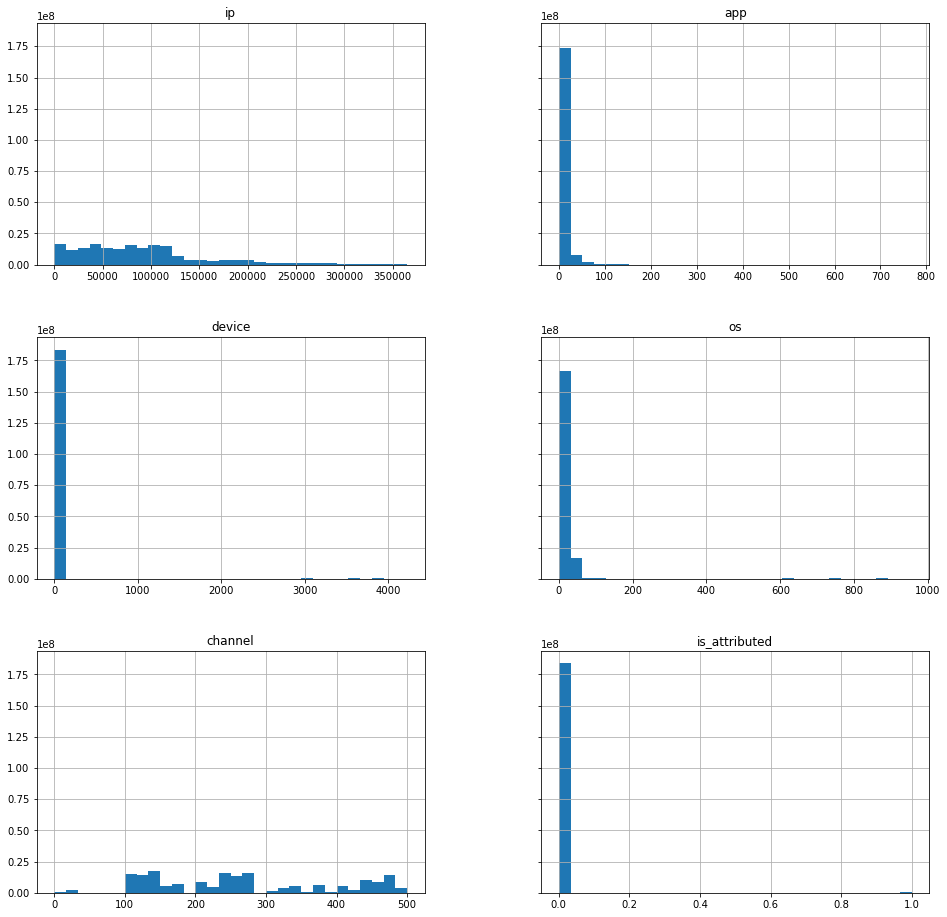

In [19]:
# Frequency tables for each categorical feature
# for column in df.select_dtypes(include=["object"]).columns:
#     display(pd.crosstab(index=df[column], columns="% observations", normalize="columns"))

# Histograms for each numeric features
%matplotlib inline
hist = df.hist(bins=30, sharey=True, figsize=(16, 16))

In [40]:
len(df.app.unique())

706

In [27]:
import matplotlib.pyplot as plt
from IPython.display import display

### 각 컬럼별 Fraud Detect 의 분포율을 봅니다.

ip


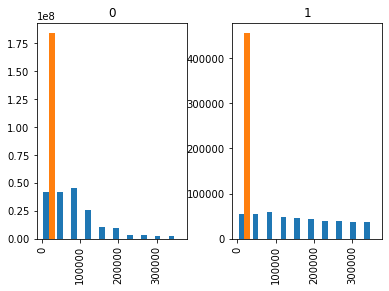

app


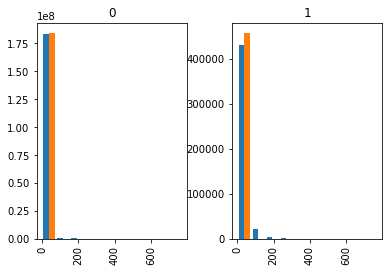

device


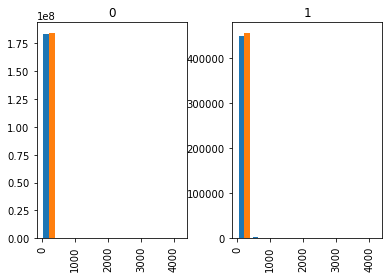

os


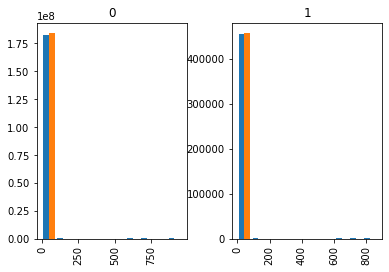

channel


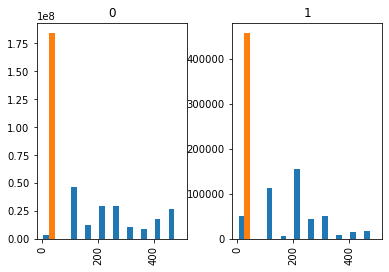

click_time


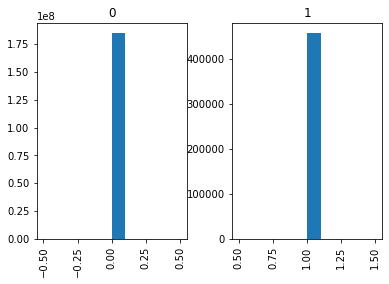

In [35]:
for column in df.select_dtypes(exclude=["object"]).columns:
    if column != "is_attributed":
        print(column)
        hist = df[[column, "is_attributed"]].hist(by="is_attributed")
        plt.show()

### 각 컬럼들간의 co-relation 을 확인합니다.

In [34]:
display(df.corr())
pd.plotting.scatter_matrix(df, figsize=(12, 12))
plt.show()

,ip,app,device,os,channel,is_attributed
ip,1.0,0.0,-0.0,-0.0,0.0,0.1
app,0.0,1.0,0.3,0.3,-0.0,0.1
device,-0.0,0.3,1.0,0.9,-0.0,0.0
os,-0.0,0.3,0.9,1.0,-0.0,0.0
channel,0.0,-0.0,-0.0,-0.0,1.0,-0.0
is_attributed,0.1,0.1,0.0,0.0,-0.0,1.0


KeyboardInterrupt: 